In [1]:
from keras import models
from keras import layers

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [3]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 0s 0us/step


In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size=512,
                    validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.6098 - acc: 0.7491 - val_loss: 0.5388 - val_acc: 0.8473
Epoch 2/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.4753 - acc: 0.8767 - val_loss: 0.4449 - val_acc: 0.8693
Epoch 3/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.3799 - acc: 0.9053 - val_loss: 0.3797 - val_acc: 0.8767
Epoch 4/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.3103 - acc: 0.9187 - val_loss: 0.3357 - val_acc: 0.8843
Epoch 5/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.2625 - acc: 0.9287 - val_loss: 0.3091 - val_acc: 0.8892
Epoch 6/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.2275 - acc: 0.9371 - val_loss: 0.2954 - val_acc: 0.8892
Epoch 7/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.2003 - acc: 0.9439 - val_loss: 0.2849 - val_ac

In [7]:
modelBig = models.Sequential()
modelBig.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
modelBig.add(layers.Dense(16, activation='relu'))
modelBig.add(layers.Dense(1, activation='sigmoid'))

In [8]:
modelBig.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

historyBig = modelBig.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size=512,
                    validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.5326 - acc: 0.7917 - val_loss: 0.4064 - val_acc: 0.8700
Epoch 2/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.3258 - acc: 0.8987 - val_loss: 0.3154 - val_acc: 0.8851
Epoch 3/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.2357 - acc: 0.9245 - val_loss: 0.2827 - val_acc: 0.8899
Epoch 4/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.1866 - acc: 0.9397 - val_loss: 0.2862 - val_acc: 0.8838
Epoch 5/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.1502 - acc: 0.9521 - val_loss: 0.2768 - val_acc: 0.8887
Epoch 6/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.1256 - acc: 0.9615 - val_loss: 0.3118 - val_acc: 0.8800
Epoch 7/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.1045 - acc: 0.9687 - val_loss: 0.3120 - val_a

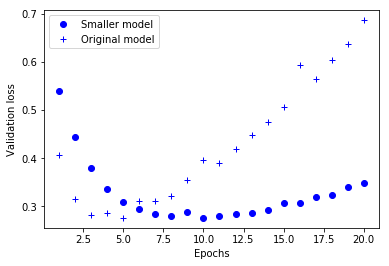

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history
historyBig_dict = historyBig.history
loss_values = history_dict['loss']
loss_values_big = historyBig_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values_big = historyBig_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, val_loss_values, 'bo', label='Smaller model')
plt.plot(epochs, val_loss_values_big, 'b+', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [11]:
model_huge = models.Sequential()
model_huge.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model_huge.add(layers.Dense(512, activation='relu'))
model_huge.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model_huge.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history_huge = model_huge.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size=512,
                    validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.5329 - acc: 0.7753 - val_loss: 0.2883 - val_acc: 0.8817
Epoch 2/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.2727 - acc: 0.8928 - val_loss: 0.2917 - val_acc: 0.8820
Epoch 3/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.1574 - acc: 0.9453 - val_loss: 0.2808 - val_acc: 0.8942
Epoch 4/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.0808 - acc: 0.9707 - val_loss: 0.6719 - val_acc: 0.8182
Epoch 5/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.1261 - acc: 0.9735 - val_loss: 0.3058 - val_acc: 0.8849
Epoch 6/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.0062 - acc: 0.9997 - val_loss: 0.4429 - val_acc: 0.8869
Epoch 7/20
15000/15000 [==============================] - 2s 119us/step - loss: 8.2757e-04 - acc: 1.0000 - val_loss: 0.539

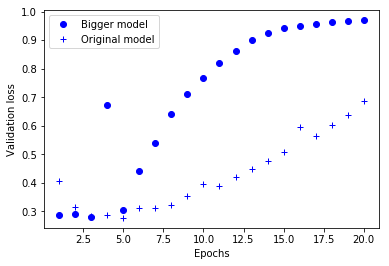

In [13]:
history_dict_huge = history_huge.history
historyBig_dict = historyBig.history
loss_values_huge = history_dict_huge['loss']
loss_values_big = historyBig_dict['loss']
val_loss_values_huge = history_dict_huge['val_loss']
val_loss_values_big = historyBig_dict['val_loss']

epochs = range(1, len(loss_values_huge) + 1)

plt.plot(epochs, val_loss_values_huge, 'bo', label='Bigger model')
plt.plot(epochs, val_loss_values_big, 'b+', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

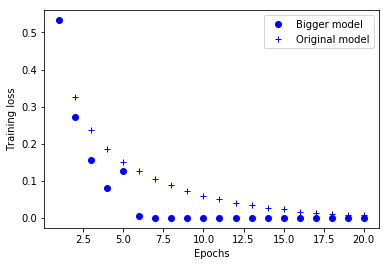

In [14]:
plt.plot(epochs, loss_values_huge, 'bo', label='Bigger model')
plt.plot(epochs, loss_values_big, 'b+', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

In [15]:
from keras import regularizers

model_l2 = models.Sequential()
model_l2.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
model_l2.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
model_l2.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model_l2.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history_l2 = model_l2.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size=512,
                    validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.5700 - acc: 0.7876 - val_loss: 0.4846 - val_acc: 0.8243
Epoch 2/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.3755 - acc: 0.8954 - val_loss: 0.3678 - val_acc: 0.8756
Epoch 3/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.2948 - acc: 0.9184 - val_loss: 0.3354 - val_acc: 0.8882
Epoch 4/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.2553 - acc: 0.9304 - val_loss: 0.3374 - val_acc: 0.8826
Epoch 5/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.2337 - acc: 0.9399 - val_loss: 0.3418 - val_acc: 0.8823
Epoch 6/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.2180 - acc: 0.9466 - val_loss: 0.3330 - val_acc: 0.8848
Epoch 7/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.2031 - acc: 0.9526 - val_loss: 0.3396 - val_ac

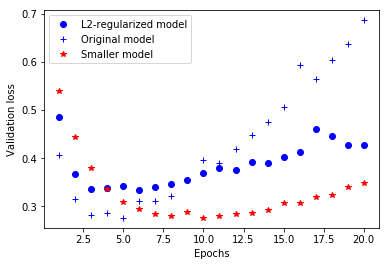

In [18]:
history_dict_l2 = history_l2.history
historyBig_dict = historyBig.history
loss_values_l2 = history_dict_l2['loss']
loss_values_big = historyBig_dict['loss']
val_loss_values_l2 = history_dict_l2['val_loss']
val_loss_values_big = historyBig_dict['val_loss']
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values_big) + 1)

plt.plot(epochs, val_loss_values_l2, 'bo', label='L2-regularized model')
plt.plot(epochs, val_loss_values_big, 'b+', label='Original model')
plt.plot(epochs, val_loss_values, 'r*', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [19]:
model_do = models.Sequential()
model_do.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_do.add(layers.Dropout(0.5))
model_do.add(layers.Dense(16, activation='relu'))
model_do.add(layers.Dropout(0.5))
model_do.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model_do.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history_do = model_do.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size=512,
                    validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.6383 - acc: 0.6236 - val_loss: 0.5497 - val_acc: 0.8381
Epoch 2/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.5392 - acc: 0.7463 - val_loss: 0.4584 - val_acc: 0.8383
Epoch 3/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.4616 - acc: 0.8129 - val_loss: 0.4049 - val_acc: 0.8526
Epoch 4/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.4007 - acc: 0.8477 - val_loss: 0.3372 - val_acc: 0.8834
Epoch 5/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.3480 - acc: 0.8749 - val_loss: 0.3140 - val_acc: 0.8842
Epoch 6/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.3063 - acc: 0.8989 - val_loss: 0.3048 - val_acc: 0.8868
Epoch 7/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.2686 - acc: 0.9145 - val_loss: 0.3007 - val_

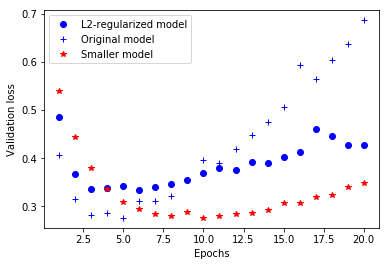

In [23]:
history_dict_do = history_do.history
loss_values_do = history_dict_do['loss']
val_loss_values_do = history_dict_do['val_loss']

epochs = range(1, len(loss_values_do) + 1)

plt.plot(epochs, val_loss_values_l2, 'bo', label='L2-regularized model')
plt.plot(epochs, val_loss_values_big, 'b+', label='Original model')
plt.plot(epochs, val_loss_values, 'r*', label='Smaller model')

plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()